{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Reproject a vector dataset to another `CRS` in `Python`
* Identify the `CRS` of a spatial dataset in `Python`

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the
spatial-vector-lidar data subset created for the course.

[<i class="fa fa-download" aria-hidden="true"></i> Download spatial-vector-lidar data subset (~172 MB)](https://ndownloader.figshare.com/files/12459464){:data-proofer-ignore='' .btn }

</div>





## Data in Different Coordinate Reference Systems

Often when data do not line up properly, it is because they are in different 
coordinate reference systems (CRS). In this lesson you will learn how to reproject 
data from one CRS to another - so that the data line up properly. 

You will use the `geopandas`, `numpy` and `matplotlib` libraries in this tutorial.

## Working With Spatial Data From Different Sources
You often need to gather spatial datasets for from
different sources and/or data that cover different spatial `extents`. Spatial
data from different sources and that cover different extents are often in
different Coordinate Reference Systems (CRS).

Some reasons for data being in different CRSs include:

1. The data are stored in a particular CRS convention used by the data
provider which might be a federal agency, or a state planning office.
2. The data are stored in a particular CRS that is customized to a region.
For instance, many states prefer to use a **State Plane** projection customized
for that state.

<figure>
    <a href="{{ site.url }}/images/courses/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg">
    <img src="{{ site.url }}/images/courses/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg" alt="Maps of the United States using data in different projections.">
    </a>

    <figcaption>Maps of the United States using data in different projections.
    Notice the differences in shape associated with each different projection.
    These differences are a direct result of the calculations used to "flatten"
    the data onto a 2-dimensional map. Often data are stored purposefully in a
    particular projection that optimizes the relative shape and size of
    surrounding geographic boundaries (states, counties, countries, etc).
    Source: opennews.org</figcaption>
</figure>


In this lesson, you will reproject vector data to create a map of the roads near the NEON San Joaquin Experimental Range (SJER) site in Madera County, California.  

## Import Packages and Data 

To get started, `import` the packages you will need for this lesson into `Python` and set the current working directory. 

In [38]:
# import necessary packages to work with spatial data in Python
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os 
import earthpy as et 
plt.ion()

# set the current working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Import the vector data for the Madera County roads and for the boundary of the NEON SJER site. 

In [39]:
# import the road data 
madera_roads = gpd.read_file("data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp")

# import the boundary of SJER
# aoi stands for area of interest
sjer_aoi = gpd.read_file("data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp")

## Identify the CRS

View the CRS of each layer using `.crs` attribute of `geopandas dataframes` (e.g. `dataframename.crs`).

In [40]:
# view the coordinate reference system of both layers 
print(madera_roads.crs)
print(sjer_aoi.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:32611'}


Notice that the EPSG codes do not match. 

Look up the EPSG codes for <a href="http://spatialreference.org/ref/epsg/nad83/">4269</a> and <a href="http://spatialreference.org/ref/epsg/32611/">32611</a>. What differences do you notice between these coordinate systems?

Next, plot your data. Does anything look off?

## Plot Data

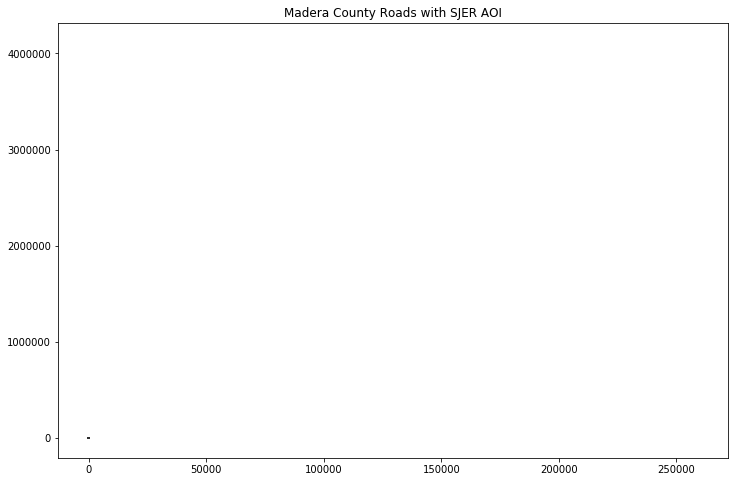

In [41]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
madera_roads.plot(cmap='Greys', ax=ax, alpha=.5)

# add the SJER boundary to the plot
sjer_aoi.plot(ax=ax, markersize=10, color='r')

# add a title for the plot
ax.set_title("Madera County Roads with SJER AOI");

## Different Data, Same Location, Different Spatial Extents 

View the spatial extent of each layer using `.total_bounds` attribute of `geopandas dataframes` (e.g. `dataframename.total_bounds`).

In [42]:
# view the spatial extent of both layers 
print(madera_roads.total_bounds)
print(sjer_aoi.total_bounds)

[-120.530241   36.771309 -119.031075   37.686847]
[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]


Note the difference in the units for each dataset. The spatial extent for the roads is latitude and longitude, while the spatial extent for `sjer_aoi` is in UTM (meters). 

Imagine drawing a box on a grid using these extents. The two extents DO NOT OVERLAP. Yet you know that your data should overlap. 


## Reproject Vector Data in Geopandas

To plot the data together, they need to be in the same CRS. You can change the CRS, which means you need to reproject the data from one CRS to another CRS using the `geopandas` method (i.e. function belonging to `geopandas` objects): `to_crs()`

The `to_crs()` method requires two inputs:

1. the name of the object that you wish to transform (e.g. `dataframename.to_crs()`)
2. the CRS that you wish to transform that object to (e.g. `dataframename.to_crs(crs-info)`) - this can be in the EPSG format or an entire Proj.4 string, which you can find on the <a href="http://spatialreference.org/">Spatial Reference website.</a> 


To use the EPSG code, specify the CRS as follows:

`'init': 'epsg:4269'`


<i class="fa fa-star"></i> **Important:** When you reproject data, you are modifying it. Thus, you are introducing some uncertainty into your data. While this is a slightly less important issue when working with vector data (compared to raster), it's important to consider.
{: .notice--warning }

Often you may consider keeping the data that you are doing the analysis on in the correct projection that best relates spatially to the area that you are working in. To get to the point, be sure to use the CRS that best minimizes errors in distance/area/shape, based on your analysis needs. 

If you are simply reprojecting to create a base map, then which dataset you reproject matters a lot less because no analysis is involved! However, some people with a keen eye for CRSs may give you a hard time for using the wrong CRS for your study area.

<i class="fa fa-star"></i> **Data Tip:** `.to_crs()` will only work if your
original spatial object has a CRS assigned to it AND if that CRS is the
correct CRS for that data!
{: .notice--warning }

For this lesson, reproject the SJER boundary to match the Madera County roads in EPSG 4269. 

Assign a new name to the reprojected data that clearly identifies the CRS. Suggestion: `sjer_aoi_wgs84`.

In [43]:
# reproject the SJER boundary to match the roads layer using the EPSG code
sjer_aoi_wgs84  = sjer_aoi.to_crs({'init': 'epsg:4269'})

Create a new plot using the reprojected data for the SJER boundary.

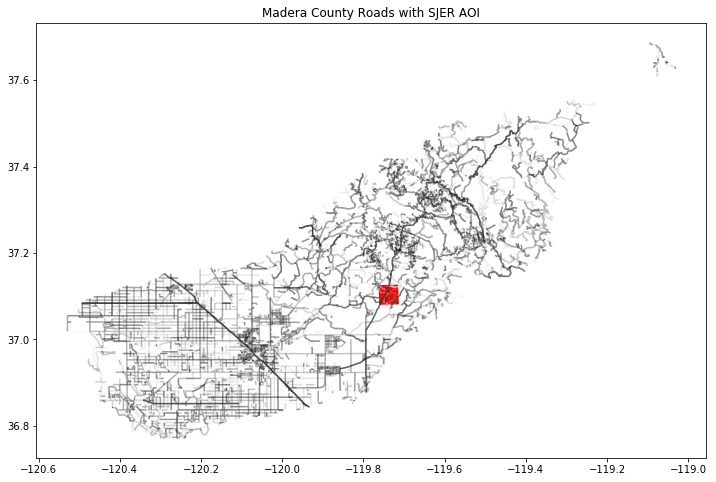

In [44]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
madera_roads.plot(cmap='Greys', ax=ax, alpha=.5)

# add the reprojected SJER boundary to the plot
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color='r')

# add a title for the plot
ax.set_title("Madera County Roads with SJER AOI");

Congratulations! You have now reprojected a dataset to be able to map the SJER boundary on top of the Madera County roads layer. 

What do you notice about the resultant plot?  Can you see where the SJER boundary is within California?


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge
You know what to do! Create a map that includes the following layers:

* United States Boundary: `data/spatial-vector-lidar/usa/usa-boundary-dissolved.shp`
* State Boundary: `data/spatial-vector-lidar/usa/usa-states-census-2014.shp`
* SJER AOI: `data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp`

HINT: the SJER boundary is very small relative to the entire United States. Try to zoom in on your map using the following code to set the x and y limits on your plot:

`ax.set(xlim=[-125, -116], ylim=[35, 40])`

Remember: check the CRS of each dataset!

</div>

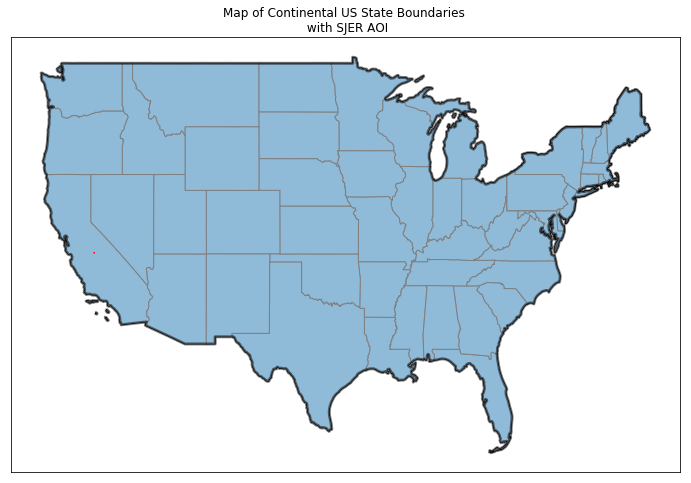

In [45]:
# Map at extent of the United States

# import United States country boundary
country_boundary_us = gpd.read_file('data/spatial-vector-lidar/usa/usa-boundary-dissolved.shp')

# import United States state boundaries
state_boundary_us = gpd.read_file('data/spatial-vector-lidar/usa/usa-states-census-2014.shp')

#import the reprojected SJER boundary
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# add the state boundaries to the plot
state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

# add the United States country boundary to the plot
country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

# add the reprojected SJER boundary to the plot
sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

# add a titlet to the plot
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# turn off axis  
ax.set(xticks = [], yticks = []);

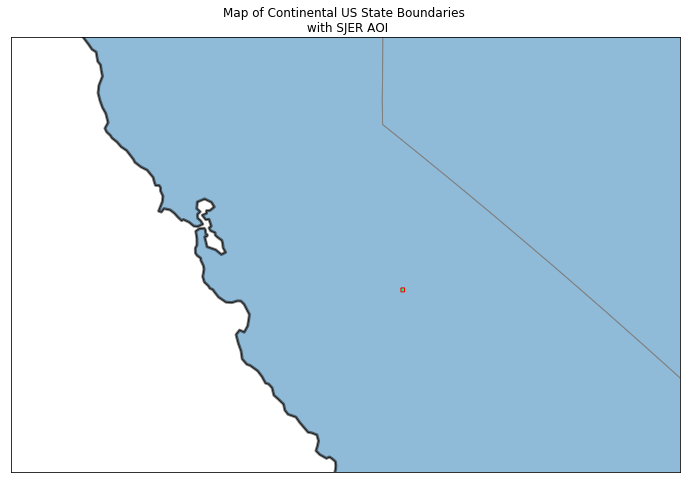

In [46]:
# Map at the extent of the area surrounding SJER

# import United States country boundary
country_boundary_us = gpd.read_file('data/spatial-vector-lidar/usa/usa-boundary-dissolved.shp')

# import United States state boundaries
state_boundary_us = gpd.read_file('data/spatial-vector-lidar/usa/usa-states-census-2014.shp')

#import the reprojected SJER boundary
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# add the state boundaries to the plot
state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

# add the United States country boundary to the plot
country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

# add the reprojected SJER boundary to the plot
sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

# add a titlet to the plot
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# zoom in on just the area surrounding SJER
ax.set(xlim=[-125, -116], ylim=[35, 40])

# turn off axis  
ax.set(xticks = [], yticks = []);



<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge 2

The SJER boundary is difficult to see at the full extent of the United States. 

You can turn a single polygon into a point using the `.centroid()` method as follows:

`sjer_aoi["geometry"].centroid`

Create a plot of the United States with the SJER study site location marked as a POINT marker rather than a polygon. Your map will look like one of the ones below depending upon whether you decide to limit the x and y extents.

</div>

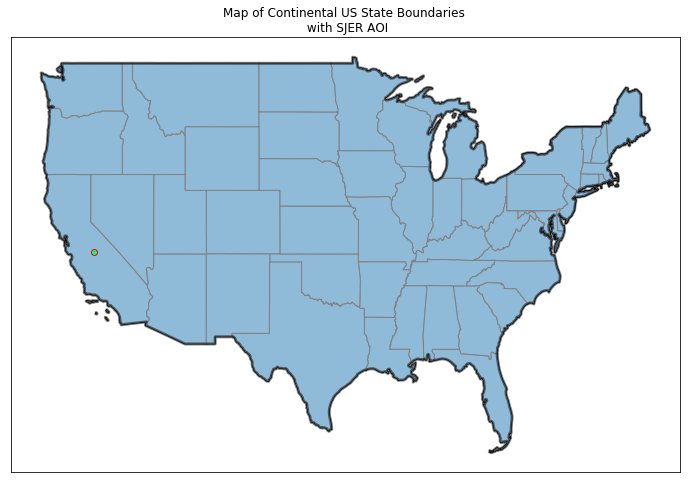

In [47]:
# Map at the extent of the United States

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# add the state boundaries to the plot
state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

# add the United States country boundary to the plot
country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

# add the center of the reprojected SJER boundary
sjer_aoi_WGS84["geometry"].centroid.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

# add a titlet to the plot
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# turn off axis  
ax.set(xticks = [], yticks = []);

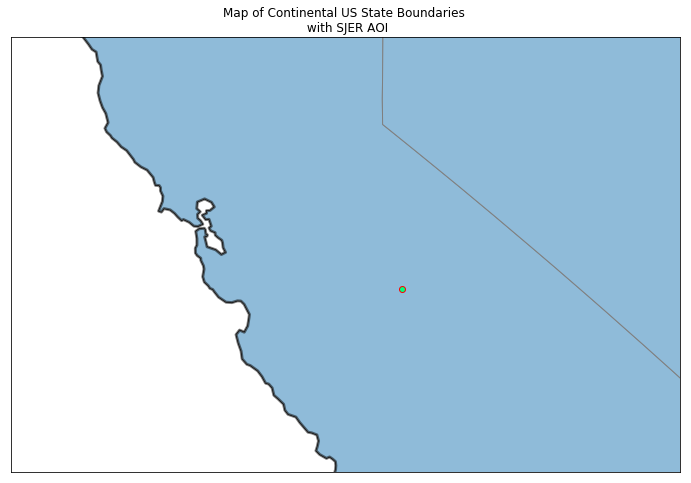

In [48]:
# Map at extent of the area surrounding SJER

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# add the state boundaries to the plot
state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

# add the United States country boundary to the plot
country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

# add the center of the reprojected SJER boundary
sjer_aoi_WGS84["geometry"].centroid.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

# add a titlet to the plot
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")


# zoom in on just the area surrounding SJER
ax.set(xlim=[-125, -116], ylim=[35, 40])

# turn off axis  
ax.set(xticks = [], yticks = []);

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge 3

Reproject the original SJER boundary using the full Proj.4 string for EPSG 4269, which you can find on its <a href="http://spatialreference.org/ref/epsg/nad83/">Spatial Reference webpage</a> and then create the original plot of the Madera County roads and the SJER boundary. 

`+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs`

</div>

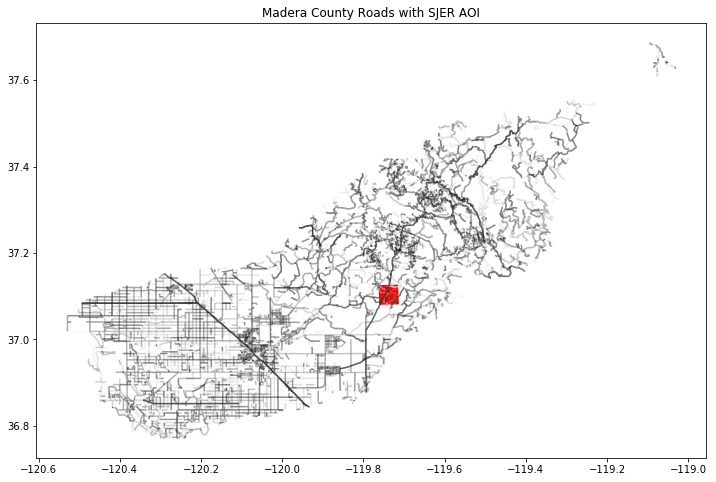

In [49]:
# reproject the SJER boundary to match the roads layer using the Proj.4 definition
sjer_aoi_wgs84_2 = sjer_aoi.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
madera_roads.plot(cmap='Greys', ax=ax, alpha=.5)

# add the reprojected SJER boundary to the plot
sjer_aoi_wgs84_2.plot(ax=ax, markersize=10, color='r')

# add a title for the plot
ax.set_title("Madera County Roads with SJER AOI");



<div class="notice--info" markdown="1">

## Additional Resources - CRS 

* <a href="http://proj.maptools.org/faq.html" target="_blank">More information on the proj.4 format.</a>
* <a href="http://spatialreference.org" target="_blank">An excellent CRS reference website</a>
</div>